In [1]:
import scipy.stats, numpy, time
from matplotlib import pyplot
%matplotlib inline
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = 20, 5

In [2]:
N_trials = 10000
max_over_ns = list(range(1,10)) + list(range(10, 100, 10)) + list(range(100, 1001, 100))

normal_pool = numpy.random.randn(N_trials * max(max_over_ns))

In [3]:
maximas = [
    numpy.ndarray(buffer=normal_pool.data, shape=(N_trials, max_over_n)).max(axis=1)
    for max_over_n in max_over_ns
]

In [5]:
dist_names = ['gumbel_r', 'frechet_r', 'genextreme']

fitted_parameters = [
    [
        dist.fit(maxima_distribution)
        for maxima_distribution in maximas
    ]
    for dist_name in dist_names
    for dist in [getattr(scipy.stats, dist_name)] #alias
]

/home/herbert/Repositories/COGAS/venv3/lib/python3.4/site-packages/scipy/stats/_continuous_distns.py:1776: RuntimeWarning: invalid value encountered in true_divide
  np.sign(c)*(-g3+(g2+2*g2mg12)*g1)/((g2mg12)**(3./2.)))
/home/herbert/Repositories/COGAS/venv3/lib/python3.4/site-packages/scipy/stats/_continuous_distns.py:1781: RuntimeWarning: invalid value encountered in true_divide
  (g4+(-4*g3+3*(g2+g2mg12)*g1)*g1)/((g2mg12)**2))
/home/herbert/Repositories/COGAS/venv3/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:1543: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


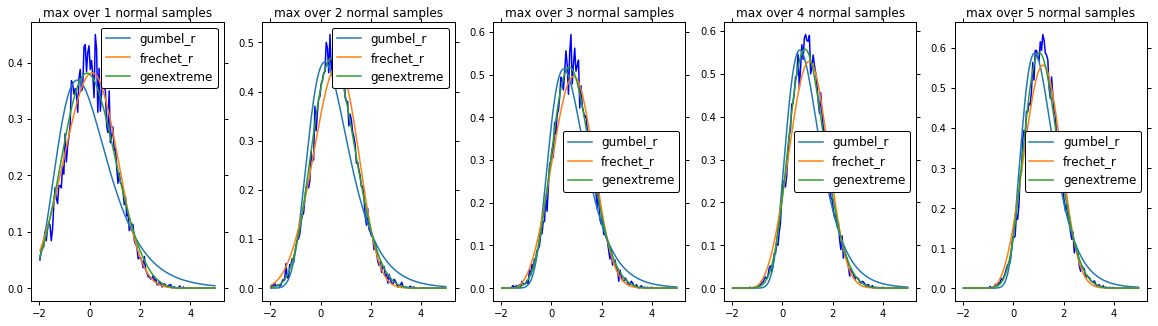

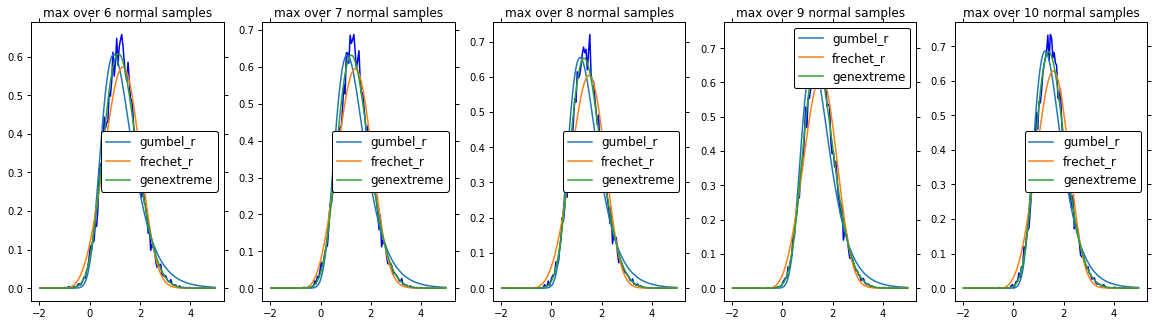

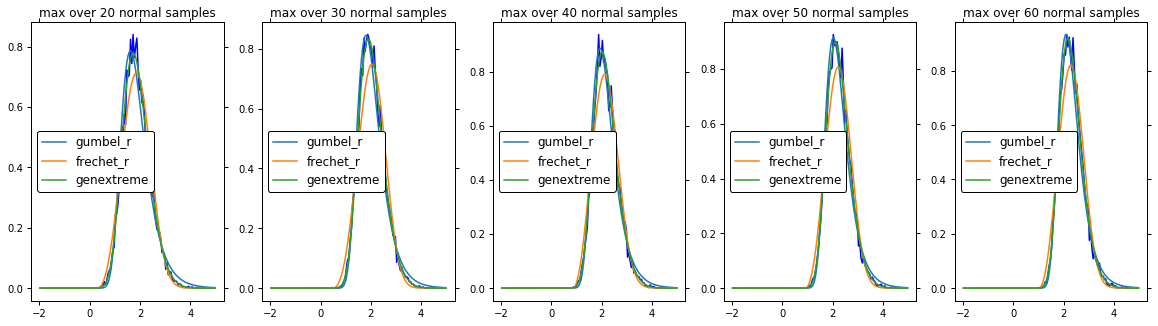

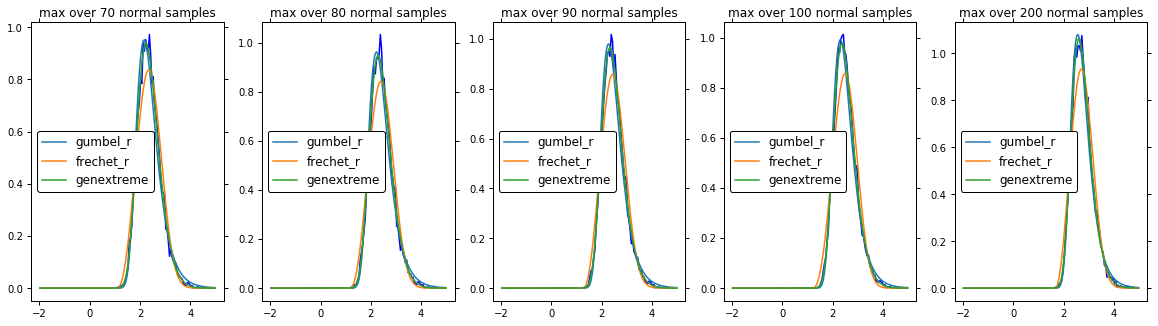

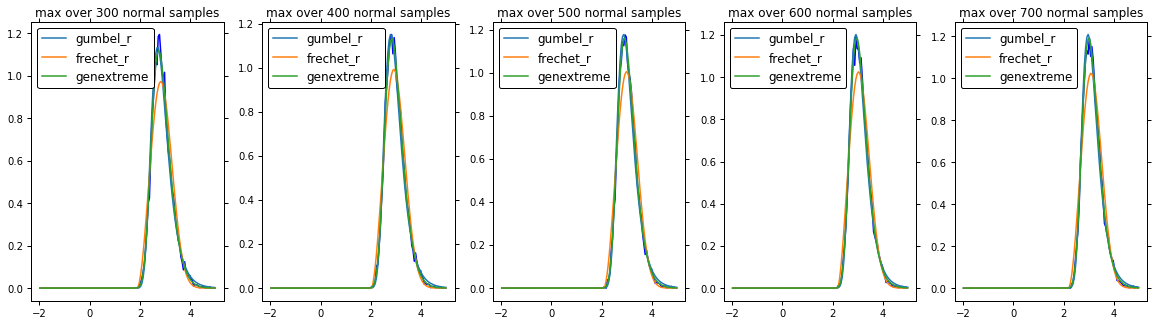

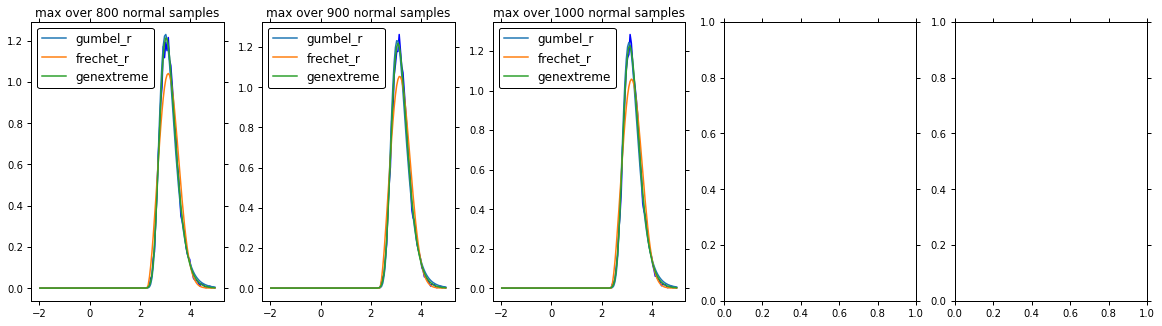

In [6]:
width = 0.05
boundaries = numpy.arange(-2,5.001,width)
centers = (boundaries[1:] + boundaries[:-1]) / 2


for maxima_distribution, parameters, max_over_n, axis in zip(
        maximas,
        zip(*fitted_parameters),
        max_over_ns,
        pyplot.subplots_iterator(1,5, show_in_between=True)
    ):
    histogram = numpy.histogram(maxima_distribution, boundaries)[0]
    axis.plot(centers, histogram / (width * N_trials), 'b')
    
    for param, dist_name in zip(parameters, dists):
        dist = getattr(scipy.stats, dist_name)
        pdf_fitted = dist.pdf(centers, *param[:-2], loc=param[-2], scale=param[-1])
        axis.plot(centers, pdf_fitted, label=dist_name)
    
    axis.legend()
    axis.set_title('max over {0} normal samples'.format(max_over_n))

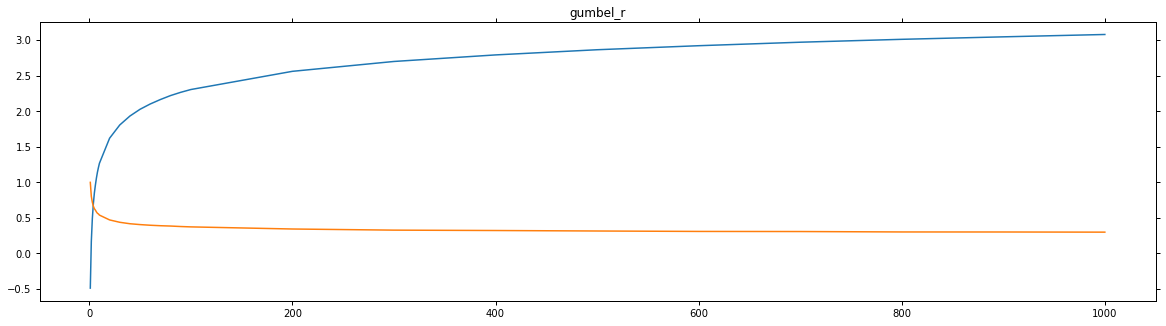

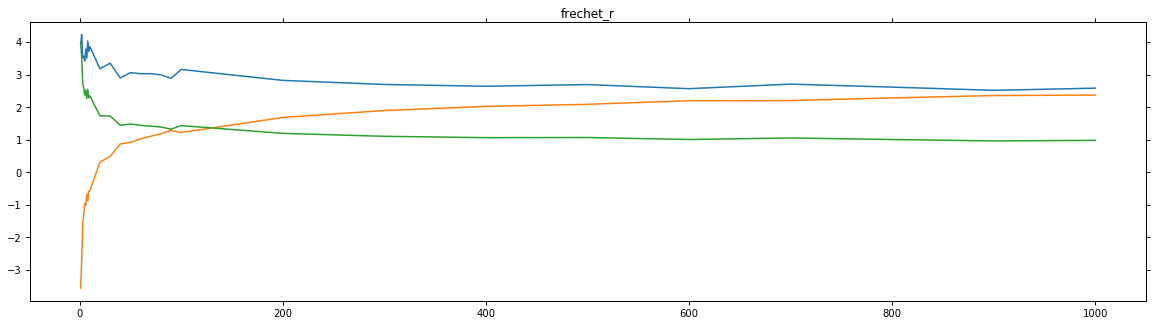

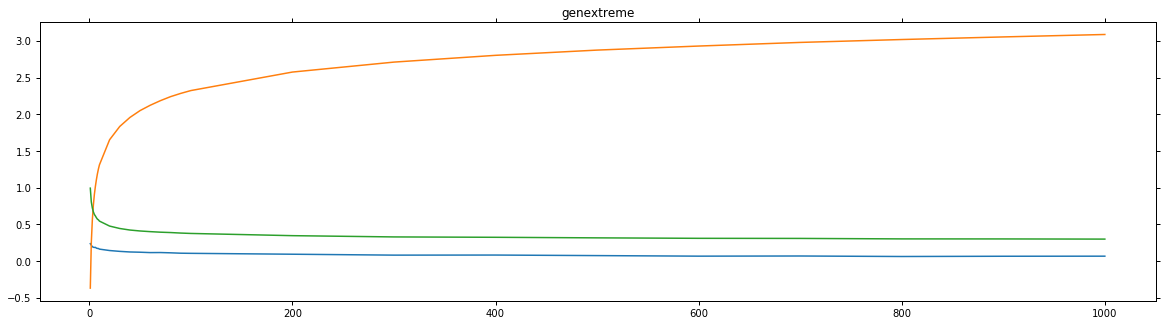

In [7]:
for param_list, dist_name in zip(params, dists):
    pyplot.figure()
    pyplot.plot(max_over_ns, numpy.array(param_list))
    pyplot.title(dist_name)
    
pyplot.show()